In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import os
import json

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
df = pd.read_csv('conformance_results.csv')

df.head()

,algorithm,top_n,fitness_tok.perc_fit_traces,fitness_tok.average_trace_fitness,fitness_tok.log_fitness,fitness_tok.percentage_of_fitting_traces,fitness_align.perc_fit_traces,fitness_align.average_trace_fitness,fitness_align.average_fitness,fitness_align.log_fitness,fitness_align.percentage_of_fitting_traces,precision_token_replay,precision_alignments,generalization_tbr
0,alpha_miner,10,54.226983,0.930646,0.943669,54.226983,54.226983,0.881929,0.881929,0.895645,54.226983,0.906336,0.906336,0.603859
1,inductive_miner,10,80.341633,0.981456,0.981739,80.341633,80.341633,0.965859,0.965859,0.967851,80.341633,0.728653,0.728653,0.928440
2,heuristics_miner,10,54.226983,0.930646,0.943669,54.226983,54.226983,0.881929,0.881929,0.895645,54.226983,0.906336,0.906336,0.603859
3,alpha_miner,20,1.563405,0.634799,0.628834,1.563405,0.014476,0.456966,0.456966,0.385065,0.014476,0.868393,0.868393,0.879377
4,inductive_miner,20,83.135495,0.986693,0.986833,83.135495,83.135495,0.970034,0.970034,0.972346,83.135495,0.704226,0.704226,0.934277


In [4]:
df.columns

Index(['algorithm', 'top_n', 'fitness_tok.perc_fit_traces',
       'fitness_tok.average_trace_fitness', 'fitness_tok.log_fitness',
       'fitness_tok.percentage_of_fitting_traces',
       'fitness_align.perc_fit_traces', 'fitness_align.average_trace_fitness',
       'fitness_align.average_fitness', 'fitness_align.log_fitness',
       'fitness_align.percentage_of_fitting_traces', 'precision_token_replay',
       'precision_alignments', 'generalization_tbr'],
      dtype='object')

In [5]:
df.tail()

,algorithm,top_n,fitness_tok.perc_fit_traces,fitness_tok.average_trace_fitness,fitness_tok.log_fitness,fitness_tok.percentage_of_fitting_traces,fitness_align.perc_fit_traces,fitness_align.average_trace_fitness,fitness_align.average_fitness,fitness_align.log_fitness,fitness_align.percentage_of_fitting_traces,precision_token_replay,precision_alignments,generalization_tbr
13,inductive_miner,70,98.045744,0.999318,0.999248,98.045744,98.045744,0.998475,0.998475,0.998023,98.045744,0.640331,0.640331,0.919631
14,heuristics_miner,70,56.354951,0.953439,0.965868,56.354951,56.354951,0.841647,0.841647,0.875297,56.354951,0.999979,0.999979,0.631966
15,alpha_miner,100,1.983208,0.568457,0.510202,1.983208,0.289519,0.215307,0.215307,0.169740,0.289519,0.801590,0.801590,0.879377
16,inductive_miner,100,100.000000,1.000000,1.000000,100.000000,100.000000,1.000000,1.000000,0.999891,100.000000,0.630497,0.630497,0.913409
17,heuristics_miner,100,60.104227,0.958949,0.970520,60.104227,60.104227,0.858707,0.858707,0.890294,60.104227,0.998277,0.998277,0.622192


In [17]:
def create_accuracy_plot(df, col, to_save=False ):
    fig = px.line(df, x='top_n', y=col, color='algorithm', title=f'{col.replace("_", " ").title()}', markers=True)
    fig.update_layout(xaxis_title='Top N', yaxis_title='Accuracy', legend_title='Algorithm')
    if to_save:
        fig.write_image(f'accuracy_plots/{col}.png')
    fig.show()


import matplotlib.pyplot as plt
import seaborn as sns
import os

def create_accuracy_plot_to_save(df, col, to_save=False):
    plt.figure(figsize=(10, 6))
    sns.set_theme(style="whitegrid")

    # Lineplot with markers for each algorithm
    sns.lineplot(
        data=df,
        x='top_n',
        y=col,
        hue='algorithm',
        marker='o',
        palette='Set2'
    )

    # Title and labels
    plt.title(col.replace('_', ' ').title(), fontsize=14)
    plt.xlabel('Top N', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.legend(title='Algorithm', loc='upper right',
        # bbox_to_anchor=(1.05, 1),
        # borderaxespad=0.
        )
    plt.tight_layout()

    # Save plot if needed
    if to_save:
        os.makedirs("accuracy_plots", exist_ok=True)
        plt.savefig(f"accuracy_plots/{col}.png", dpi=300)

    plt.show()


# create a plot of the accuracy of each algorithm
# create_accuracy_plot(df, 'fitness_tok_perc_fit_traces')

In [18]:
df.columns

Index(['algorithm', 'top_n', 'fitness_tok.perc_fit_traces',
       'fitness_tok.average_trace_fitness', 'fitness_tok.log_fitness',
       'fitness_tok.percentage_of_fitting_traces',
       'fitness_align.perc_fit_traces', 'fitness_align.average_trace_fitness',
       'fitness_align.average_fitness', 'fitness_align.log_fitness',
       'fitness_align.percentage_of_fitting_traces', 'precision_token_replay',
       'precision_alignments', 'generalization_tbr'],
      dtype='object')

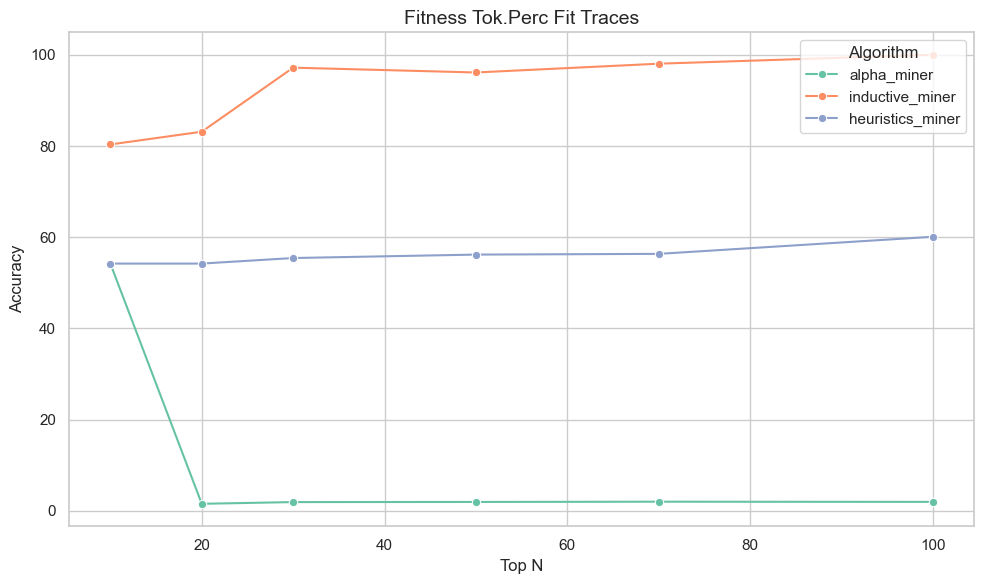

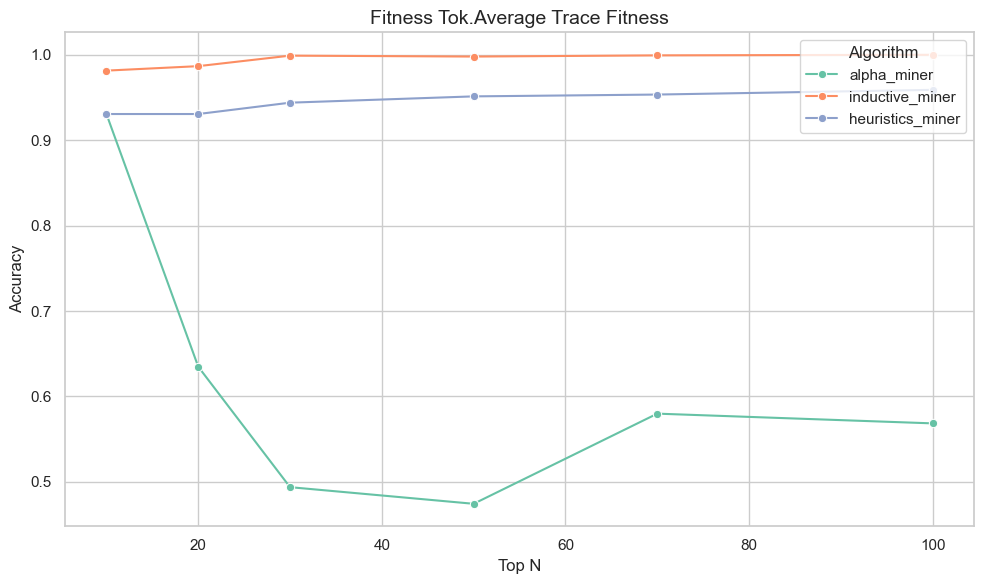

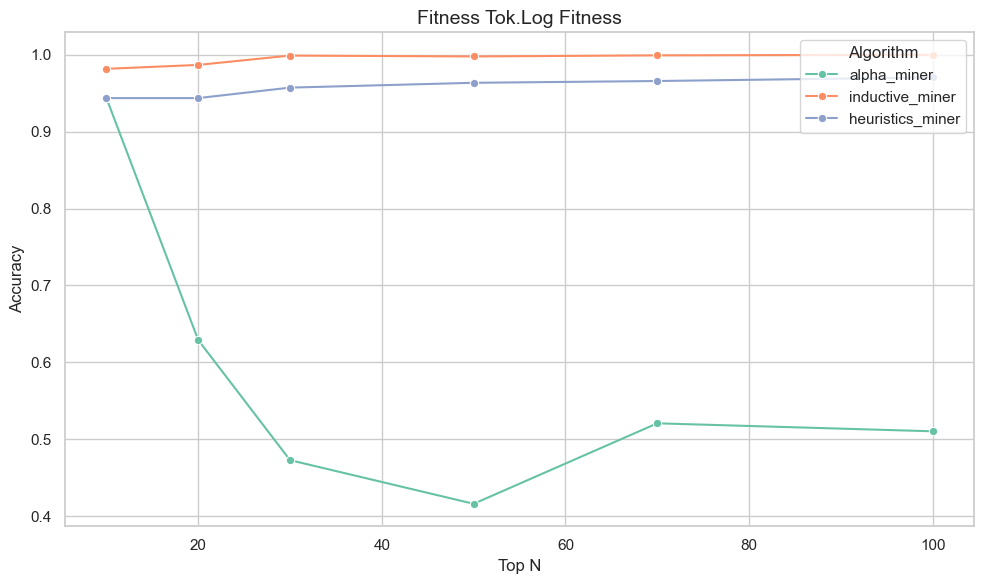

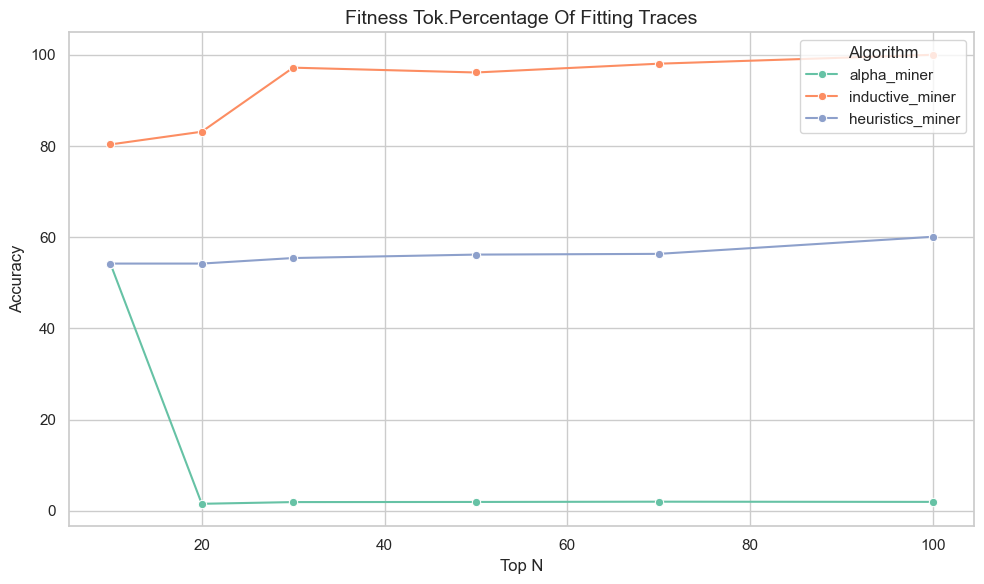

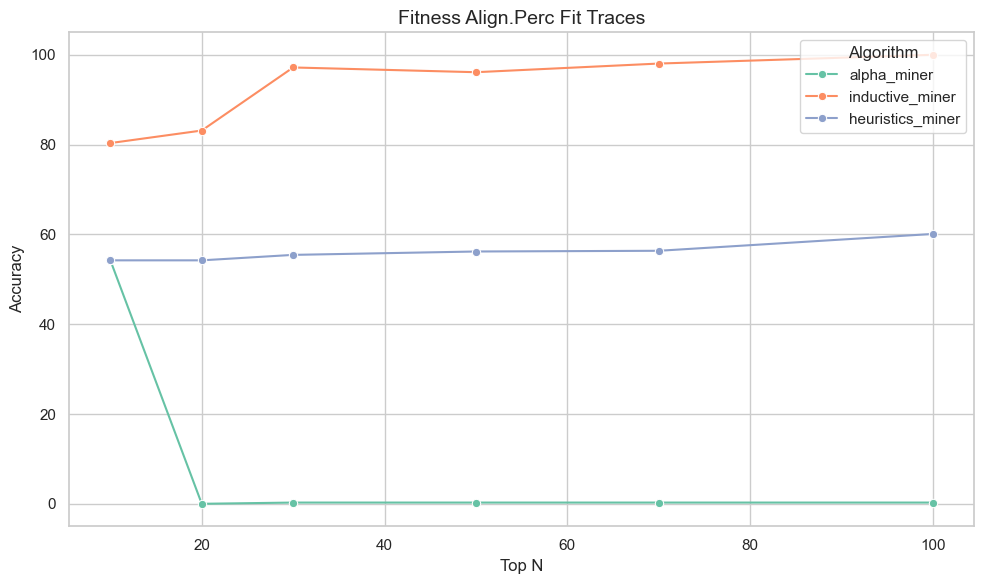

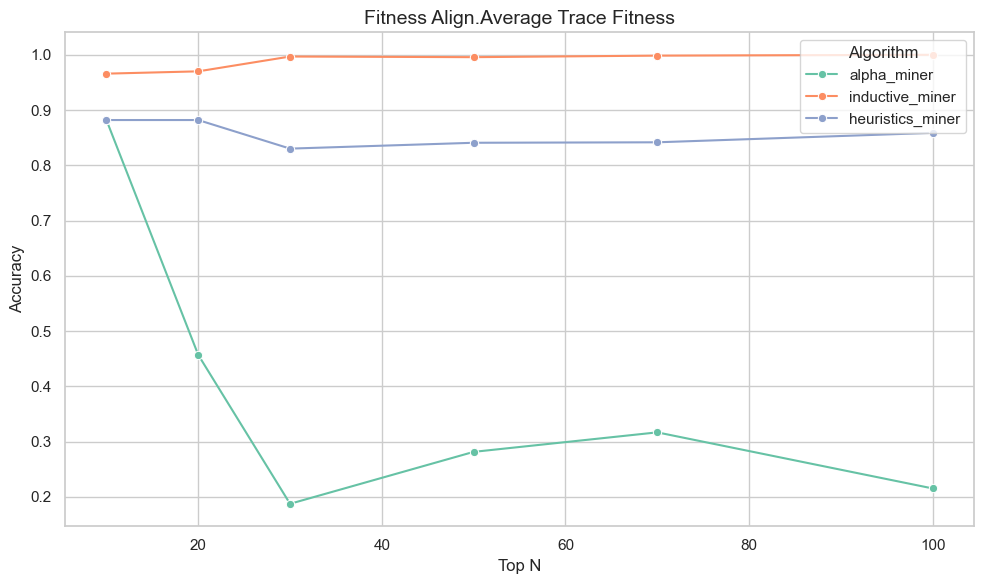

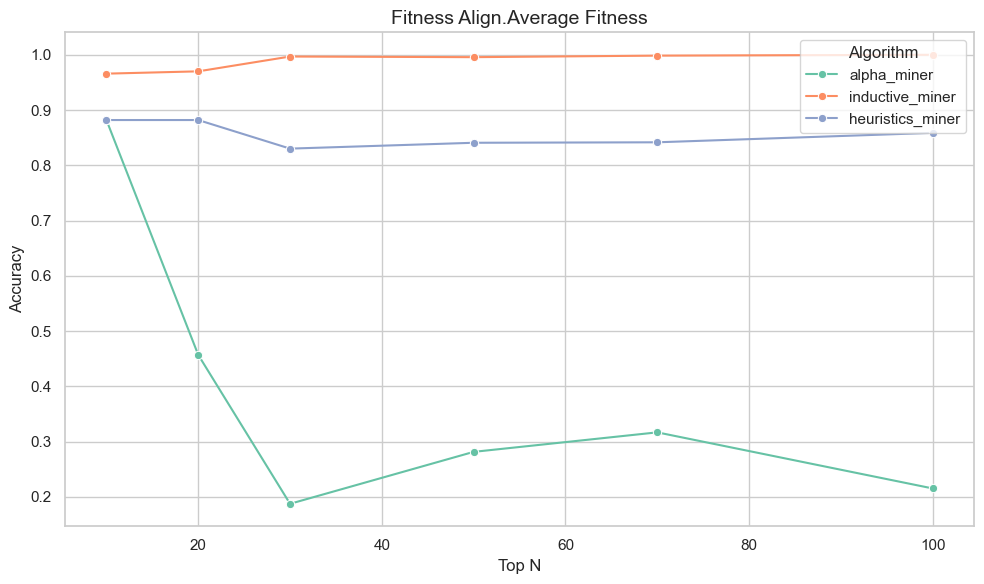

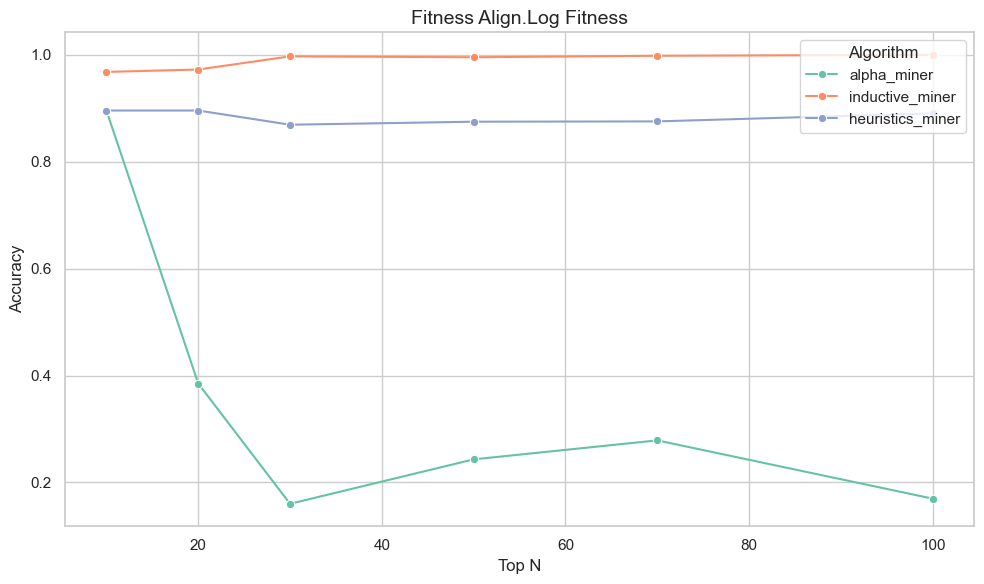

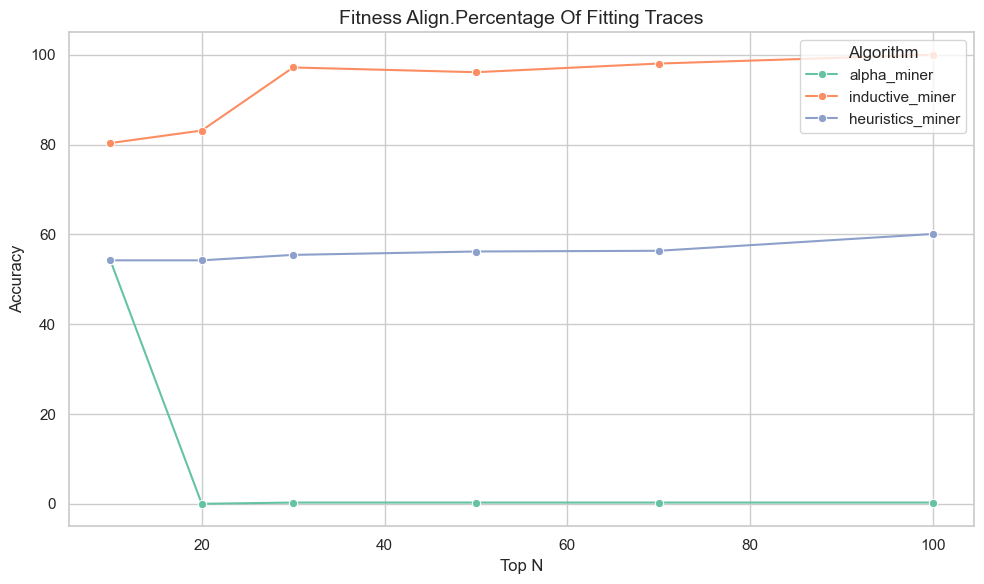

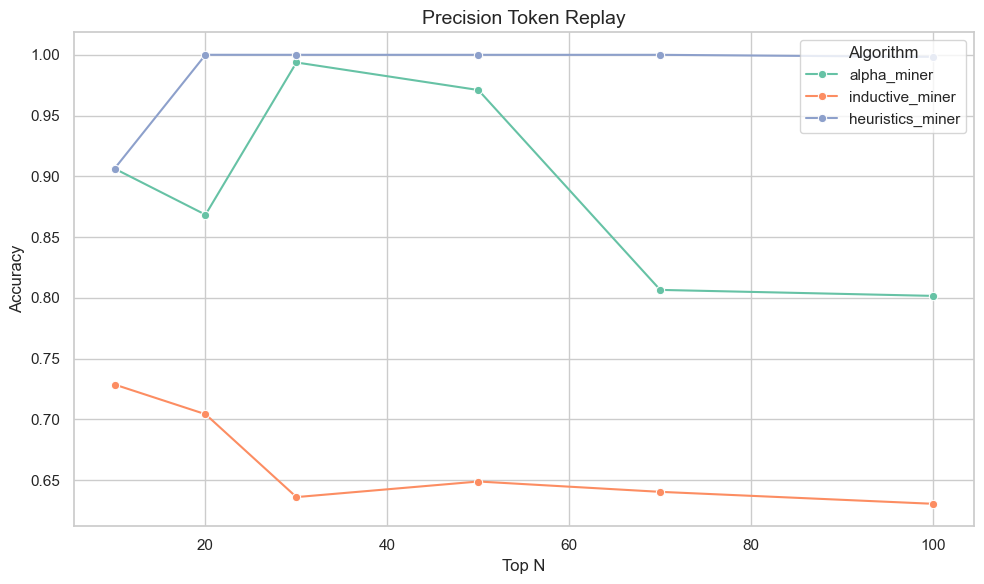

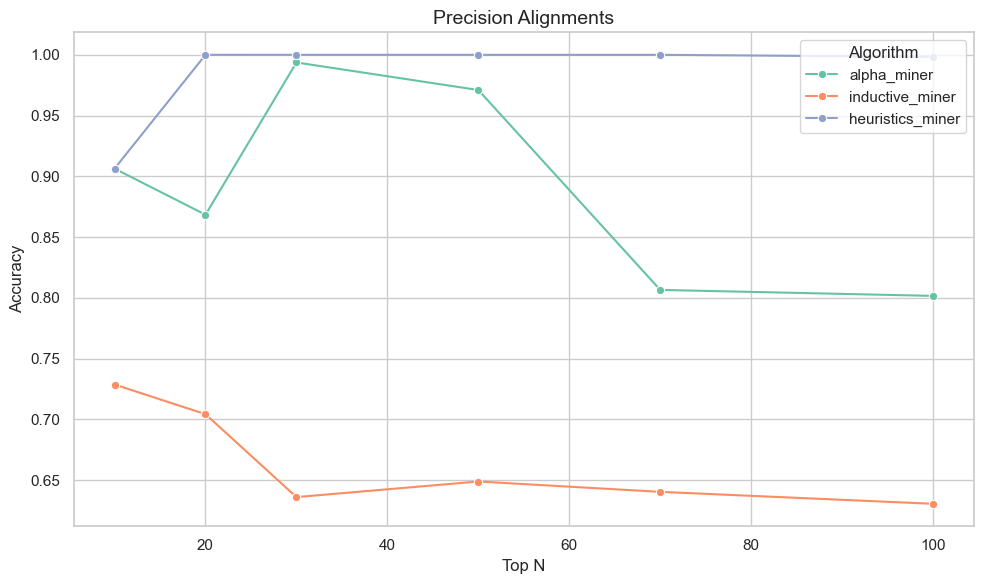

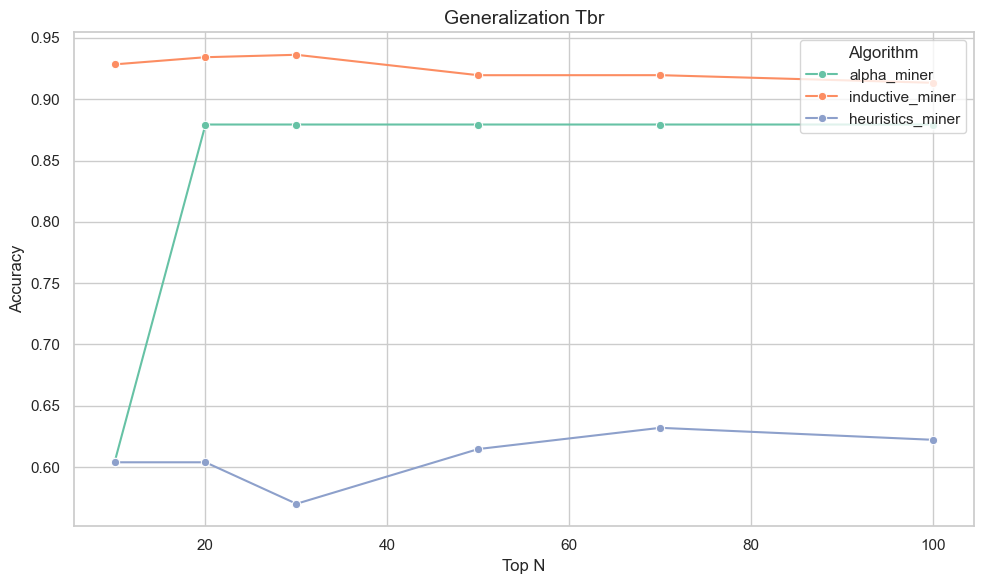

In [19]:
for col in df.columns:
    if col not in ['top_n', 'algorithm']:
        create_accuracy_plot_to_save(df, col, True)

In [20]:
# fitness_tok_average_trace_fitness	
create_accuracy_plot(df, 'fitness_tok_average_trace_fitness')

In [21]:
# list all the files that were save in the accuracy_plots folder
os.listdir('accuracy_plots')

['fitness_tok.perc_fit_traces.png',
 'fitness_tok.average_trace_fitness.png',
 'fitness_tok.log_fitness.png',
 'fitness_tok.percentage_of_fitting_traces.png',
 'fitness_align.perc_fit_traces.png',
 'fitness_align.average_trace_fitness.png',
 'fitness_align.average_fitness.png',
 'fitness_align.log_fitness.png',
 'fitness_align.percentage_of_fitting_traces.png',
 'precision_token_replay.png',
 'precision_alignments.png',
 'generalization_tbr.png']

In [22]:
len(os.listdir('accuracy_plots'))

12